In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("C:\\Users\\Yash\\OneDrive\\Desktop\\Datasets and completed analysis\\Datasets\\CollegePlacement.csv")
print(df.head())

  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1       

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [13]:
df = df.drop('College_ID', axis=1)

In [15]:
df['Internship_Experience'] = df['Internship_Experience'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Placement'] = df['Placement'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
X = df.drop('Placement', axis=1)
y = df['Placement']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
y_pred = model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1674
           1       0.76      0.61      0.67       326

    accuracy                           0.90      2000
   macro avg       0.84      0.78      0.81      2000
weighted avg       0.90      0.90      0.90      2000



In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1610   64]
 [ 128  198]]


Text(0.5, 1.0, 'Confusion Matrix')

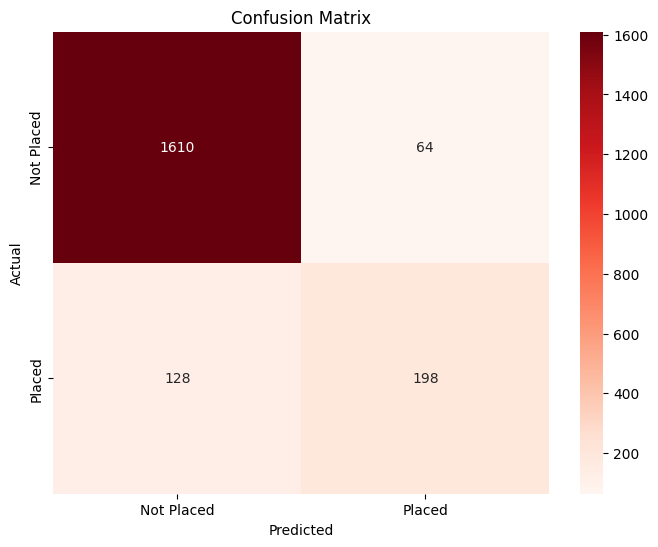

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Analysis of Model

Overall Performance: The model is generally good at predicting outcomes, especially for the "Not Placed" category. However, its performance for the "Placed" category is significantly weaker.

Correct Predictions:

The model correctly identified 1610 individuals as "Not Placed" (True Negatives).

It correctly identified 198 individuals as "Placed" (True Positives).

Incorrect Predictions:

False Alarms (False Positives): The model incorrectly predicted 64 individuals would be "Placed" when they were actually not.

Missed Detections (False Negatives): More importantly, the model failed to identify 128 individuals who were actually "Placed," predicting them as "Not Placed." This is the most critical error for this type of problem.

Key Insight: The model is much more confident and accurate when predicting someone will not get placed. It struggles more with identifying those who will be placed, missing over a third of the actual placements (128 out of 326). This suggests a potential class imbalance or that the model features are better at capturing negative outcomes.